# Nearest Neighbours

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
crimes_df = pd.read_csv("crimes_processed.csv")
meuse_df = pd.read_csv("meuse_processed.csv")

Interpolated value at [181074. 333618.]: 1022
Interpolated value at [179463. 330389.]: 162
Interpolated value at [182080. 333718.]: 257


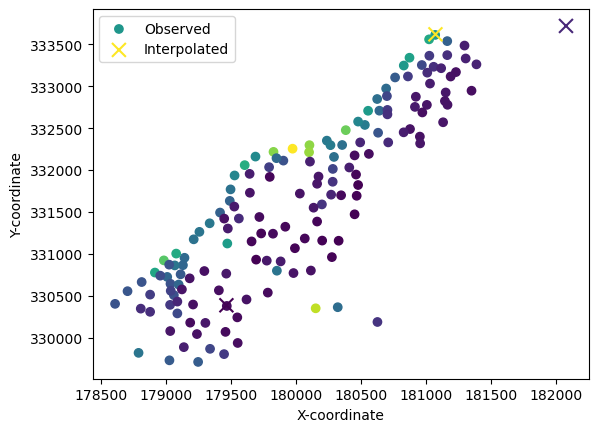

In [9]:
# Columns for observed and unobserved locations, and observed values
observed_location_columns = ['x', 'y']
unobserved_location_columns = [['181074', ' 333618'], ['179463', '330389'], ['182080', ' 333718']]
observed_values_column = 'zinc'

# Convert columns to numpy arrays
observed_locations = meuse_df[observed_location_columns].values
unobserved_locations = np.array(unobserved_location_columns, dtype=float)
observed_values = meuse_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 3

# Fit the nearest neighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)
nn_model.fit(observed_locations)

# Find nearest neighbors for unmeasured locations
distances, indices = nn_model.kneighbors(unobserved_locations)

# Interpolate values based on the nearest neighbors
interpolated_values = observed_values[indices]

# Display the results
for i in range(len(unobserved_locations)):
    print(f"Interpolated value at {unobserved_locations[i]}: {interpolated_values[i][0]}")

# Plotting for visualization
plt.scatter(meuse_df['x'], meuse_df['y'], c=meuse_df['zinc'], cmap='viridis', label='Observed')
plt.scatter(unobserved_locations[:, 0], unobserved_locations[:, 1], c=interpolated_values[:, 0], cmap='viridis', marker='x', s=100, label='Interpolated')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()
